# Tasks

#### 2: Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

- Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
- Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

#### 3: Use the elbow technique as shown in the Jupyter notebook for this Exercise.

#### 4: Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

- Explain why you chose that number in a markdown cell.
- If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

#### 5: Run the k-means algorithm.

#### 6: Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

#### 7: Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

#### 8: Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

- Note down your thoughts in a markdown cell.

#### 9: Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

#### 10: Propose what these results could be useful for in future steps of an analytics pipeline.

# Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [53]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# Importing Data

#### 2: Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

In [54]:
path = r'C:\Users\maxca\Part 6 Gun Violence'

In [55]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_gunviolence_cleand_2.csv'))

In [56]:
df.shape

(236210, 16)

In [57]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,0,95289,2014-01-01,Michigan,Muskegon,0,0,Shots Fired - No Injuries,43.2301,NaN,-86.2514,1.372442,2014-01-01,Michigan2014,20,9747730
1,1,92607,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.4142,NaN,-82.9582,1.372442,2014-01-01,Michigan2014,20,9747730
2,2,92602,2014-01-01,Michigan,Detroit,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,NaN,-83.0597,1.372442,2014-01-01,Michigan2014,20,9747730
3,3,92620,2014-01-01,Michigan,Detroit,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,NaN,-83.0643,1.372442,2014-01-01,Michigan2014,20,9747730
4,4,92612,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.3727,NaN,-83.1921,1.372442,2014-01-01,Michigan2014,20,9747730


# Dropping Columns

In [58]:
df = df.drop(columns =['Unnamed: 0', 'city_or_county', 'location_description'])

# Isolating Year

In [59]:
# convert the date column into a datetime object
df['date'] = pd.to_datetime(df['date'])

# extract the day, month, and year components
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# show the modified data frame
df.head()

,incident_id,date,state,n_killed,n_injured,incident_characteristics,latitude,longitude,n_guns_involved,year,state_year,lawtotal,Total population,day,month
0,95289,2014-01-01,Michigan,0,0,Shots Fired - No Injuries,43.2301,-86.2514,1.372442,2014,Michigan2014,20,9747730,1,1
1,92607,2014-01-01,Michigan,0,1,Shot - Wounded/Injured,42.4142,-82.9582,1.372442,2014,Michigan2014,20,9747730,1,1
2,92602,2014-01-01,Michigan,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,-83.0597,1.372442,2014,Michigan2014,20,9747730,1,1
3,92620,2014-01-01,Michigan,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,-83.0643,1.372442,2014,Michigan2014,20,9747730,1,1
4,92612,2014-01-01,Michigan,0,1,Shot - Wounded/Injured,42.3727,-83.1921,1.372442,2014,Michigan2014,20,9747730,1,1


In [60]:
df = df.drop(columns =['day', 'month', 'incident_characteristics',])

In [61]:
df.head()

,incident_id,date,state,n_killed,n_injured,latitude,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,95289,2014-01-01,Michigan,0,0,43.2301,-86.2514,1.372442,2014,Michigan2014,20,9747730
1,92607,2014-01-01,Michigan,0,1,42.4142,-82.9582,1.372442,2014,Michigan2014,20,9747730
2,92602,2014-01-01,Michigan,2,2,42.3484,-83.0597,1.372442,2014,Michigan2014,20,9747730
3,92620,2014-01-01,Michigan,0,2,42.3756,-83.0643,1.372442,2014,Michigan2014,20,9747730
4,92612,2014-01-01,Michigan,0,1,42.3727,-83.1921,1.372442,2014,Michigan2014,20,9747730


In [62]:
df.shape

(236210, 12)

In [63]:
df.head()

,incident_id,date,state,n_killed,n_injured,latitude,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,95289,2014-01-01,Michigan,0,0,43.2301,-86.2514,1.372442,2014,Michigan2014,20,9747730
1,92607,2014-01-01,Michigan,0,1,42.4142,-82.9582,1.372442,2014,Michigan2014,20,9747730
2,92602,2014-01-01,Michigan,2,2,42.3484,-83.0597,1.372442,2014,Michigan2014,20,9747730
3,92620,2014-01-01,Michigan,0,2,42.3756,-83.0643,1.372442,2014,Michigan2014,20,9747730
4,92612,2014-01-01,Michigan,0,1,42.3727,-83.1921,1.372442,2014,Michigan2014,20,9747730


# Aggregating 

In [64]:
df_agg = df.groupby('state_year').aggregate({'incident_id' : 'count', 'n_killed': 'sum',
                             'n_injured': 'sum', 'n_guns_involved' : 'sum', 'lawtotal': 'first', 'Total population' : 'first', })

In [65]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population
state_year,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293
Alabama2015,1034,385,562,1484.432117,10,4387292
Alabama2016,1309,488,761,1839.658694,10,4540957
Alabama2017,1461,544,856,1882.117325,10,4592069
Alabama2018,347,135,219,393.000000,10,4533634


In [66]:
# Calculate incidents per 100000 population
df_agg['incidents_per_100000'] = (df_agg['incident_id'] / df_agg['Total population']) * 100000

In [67]:
# Calculate n_killed per 100000 population
df_agg['n_killed_per_100000'] = (df_agg['n_killed'] / df_agg['Total population']) * 100000

In [68]:
# Calculate injured per 100000 population
df_agg['n_injured_per_100000'] = (df_agg['n_injured'] / df_agg['Total population']) * 100000

In [69]:
# Calculate n_guns_involved per 100000 population
df_agg['n_guns_involved_per_100000'] = (df_agg['n_guns_involved'] / df_agg['Total population']) * 100000

In [70]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000
state_year,,,,,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293,29.254479,7.213737,13.117904,39.777063
Alabama2015,1034,385,562,1484.432117,10,4387292,23.568069,8.775345,12.809724,33.834815
Alabama2016,1309,488,761,1839.658694,10,4540957,28.826523,10.746633,16.758582,40.512577
Alabama2017,1461,544,856,1882.117325,10,4592069,31.815724,11.846512,18.640835,40.986260
Alabama2018,347,135,219,393.000000,10,4533634,7.653904,2.977744,4.830562,8.668543


In [71]:
df_agg = df_agg[~df_agg.index.str.endswith('2018')]

In [72]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000
state_year,,,,,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293,29.254479,7.213737,13.117904,39.777063
Alabama2015,1034,385,562,1484.432117,10,4387292,23.568069,8.775345,12.809724,33.834815
Alabama2016,1309,488,761,1839.658694,10,4540957,28.826523,10.746633,16.758582,40.512577
Alabama2017,1461,544,856,1882.117325,10,4592069,31.815724,11.846512,18.640835,40.986260
Alaska2014,146,29,49,192.458346,3,627018,23.284818,4.625067,7.814768,30.694230


In [73]:
df = df.drop(columns =['state', 'incident_id'])

In [74]:
df = df.drop(columns =['state_year'])

In [75]:
df.head()

,date,n_killed,n_injured,latitude,longitude,n_guns_involved,year,lawtotal,Total population
0,2014-01-01,0,0,43.2301,-86.2514,1.372442,2014,20,9747730
1,2014-01-01,0,1,42.4142,-82.9582,1.372442,2014,20,9747730
2,2014-01-01,2,2,42.3484,-83.0597,1.372442,2014,20,9747730
3,2014-01-01,0,2,42.3756,-83.0643,1.372442,2014,20,9747730
4,2014-01-01,0,1,42.3727,-83.1921,1.372442,2014,20,9747730


# Elbow Technique

#### 3: Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [76]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [77]:
score = [kmeans[i].fit(df_agg).score(df_agg) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

[-9725198290049148.0,
 -2957605696283099.0,
 -1549287604264431.2,
 -714532743564600.0,
 -325342681302863.44,
 -220437705885461.06,
 -126445740202098.72,
 -72221998858796.56,
 -46505034887547.31]

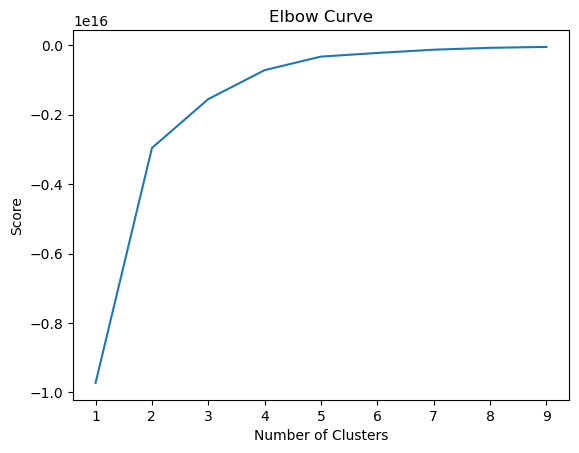

In [78]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### 4: Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

#### I've chosen 4 clusters, because after that there is no no better performance to be expected.

#### 5: Run the k-means algorithm.

In [79]:
kmeans = KMeans(n_clusters=4)

In [80]:
# Fit the k-means object to the data.

kmeans.fit(df_agg)

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [81]:
df_agg['clusters'] = kmeans.fit_predict(df_agg)

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [82]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000,clusters
state_year,,,,,,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293,29.254479,7.213737,13.117904,39.777063,0
Alabama2015,1034,385,562,1484.432117,10,4387292,23.568069,8.775345,12.809724,33.834815,0
Alabama2016,1309,488,761,1839.658694,10,4540957,28.826523,10.746633,16.758582,40.512577,0
Alabama2017,1461,544,856,1882.117325,10,4592069,31.815724,11.846512,18.640835,40.986260,0
Alaska2014,146,29,49,192.458346,3,627018,23.284818,4.625067,7.814768,30.694230,0


#### 6: Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [83]:
df_agg['clusters'].value_counts()

clusters
0    120
3     64
2     12
1      4
Name: count, dtype: int64

#### 7: Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

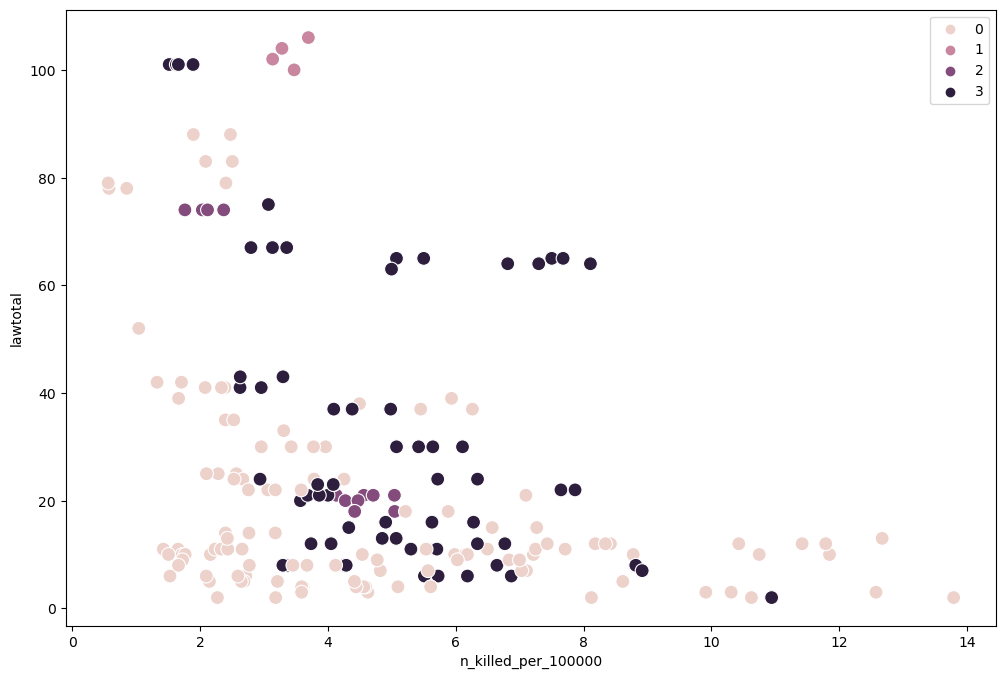

In [84]:
# Plot the clusters for the 'n_killed_per_100000' and 'lawtotal' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_agg['n_killed_per_100000'], y=df_agg['lawtotal'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('n_killed_per_100000') # Label x-axis.
plt.ylabel('lawtotal') # Label y-axis.
plt.show()

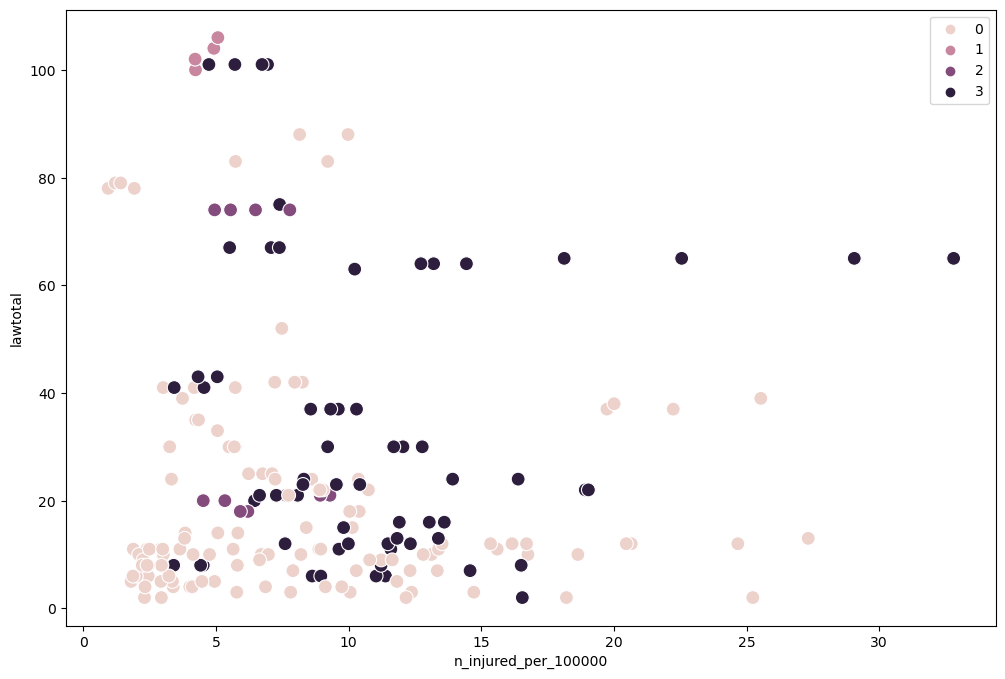

In [85]:
# Plot the clusters for the 'n_injured_per_100000' and 'lawtotal' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_agg['n_injured_per_100000'], y=df_agg['lawtotal'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('n_injured_per_100000') # Label x-axis.
plt.ylabel('lawtotal') # Label y-axis.
plt.show()

#### 8: Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.


#### 9: Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [86]:

df_agg.loc[df_agg['clusters'] == 3, 'cluster'] = 'dark purple'
df_agg.loc[df_agg['clusters'] == 2, 'cluster'] = 'purple'
df_agg.loc[df_agg['clusters'] == 1, 'cluster'] = 'dark pink'
df_agg.loc[df_agg['clusters'] == 0, 'cluster'] = 'pink'

In [87]:
df_agg.groupby('cluster').agg({'incident_id':['mean', 'median'], 
                         'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'],
                          'n_guns_involved':['mean', 'median'], 
                          'lawtotal':['mean', 'median'], 
                         'Total population':['mean', 'median'], 
                         'incidents_per_100000':['mean', 'median'],
                          'n_killed_per_100000':['mean', 'median'],
                          'n_injured_per_100000':['mean', 'median'],
                           'n_guns_involved_per_100000':['mean', 'median']})

incident_id             n_killed            n_injured          \
                    mean  median         mean  median         mean  median   
cluster                                                                      
dark pink    3792.750000  3674.5  1303.000000  1292.5  1768.250000  1756.5   
dark purple  1680.765625  1516.0   407.640625   390.0   920.140625   776.5   
pink          528.300000   396.5   124.500000    70.0   223.058333   159.0   
purple       3037.166667  3018.0   829.583333   911.5  1433.416667  1492.0   

            n_guns_involved                 lawtotal        Total population  \
                       mean       median        mean median             mean   
cluster                                                                        
dark pink       6121.594847  6239.676422  103.000000  103.0     3.837303e+07   
dark purple     2253.773785  2050.339295   33.421875   23.0     8.208756e+06   
pink             728.668143   538.774143   19.500000   11.0     2.400060e+06   
purple          4241.453090  4277.242444   38.000000   21.0     2.169215e+07   

                        incidents_per_100000            n_killed_per_100000  \
                 median                 mean     median                mean   
cluster                                                                       
dark pink    38456665.0             9.882597   9.598143            3.395671   
dark purple   7288347.5            20.313209  20.501465            4.984382   
pink          2185798.5            22.053480  20.527103            4.600406   
purple       19770896.0            14.149637  13.374056            3.744597   

                      n_injured_per_100000            \
               median                 mean    median   
cluster                                                
dark pink    3.376264             4.606440  4.571990   
dark purple  4.943162            10.767262  9.899680   
pink         3.589296             8.156542  6.810786   
purple       4.345826             6.719529  6.344863   

            n_guns_involved_per_100000             
                                  mean     median  
cluster                                            
dark pink                    15.945760  16.191166  
dark purple                  27.378840  27.932047  
pink                         30.436274  28.852500  
purple                       19.862742  19.272064

In [88]:
df_agg.groupby('clusters').agg({ 
                          'lawtotal':['mean'], 
                        
                         'incidents_per_100000':['mean'],
                          'n_killed_per_100000':['mean'],
                          'n_injured_per_100000':['mean'],
                           })

,lawtotal,incidents_per_100000,n_killed_per_100000,n_injured_per_100000
,mean,mean,mean,mean
clusters,,,,
0,19.500000,22.053480,4.600406,8.156542
1,103.000000,9.882597,3.395671,4.606440
2,38.000000,14.149637,3.744597,6.719529
3,33.421875,20.313209,4.984382,10.767262


#### The overall goal is to find the cluster with the least amount of killed/injured etc.per 100000 people. So the best performing cluster is the pink cluster (0).

#### 10: Propose what these results could be useful for in future steps of an analytics pipeline.

#### In the last part we weren't able to find any proof of an interaction between the amount of laws and the number of killed/injured etc. people. In this case here we can see that the amount of gun laws has an impact. For further analysis it is crucial to build categories in the restriction of acquiring and using guns, to further narrow down the findings.

In [89]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000,clusters,cluster
state_year,,,,,,,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293,29.254479,7.213737,13.117904,39.777063,0,pink
Alabama2015,1034,385,562,1484.432117,10,4387292,23.568069,8.775345,12.809724,33.834815,0,pink
Alabama2016,1309,488,761,1839.658694,10,4540957,28.826523,10.746633,16.758582,40.512577,0,pink
Alabama2017,1461,544,856,1882.117325,10,4592069,31.815724,11.846512,18.640835,40.986260,0,pink
Alaska2014,146,29,49,192.458346,3,627018,23.284818,4.625067,7.814768,30.694230,0,pink


In [90]:
df_agg = df_agg.drop(columns =['incident_id', 'n_killed', 'n_injured', 'n_guns_involved'])

In [91]:
df_agg.head()

,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000,clusters,cluster
state_year,,,,,,,,
Alabama2014,10,4505293,29.254479,7.213737,13.117904,39.777063,0,pink
Alabama2015,10,4387292,23.568069,8.775345,12.809724,33.834815,0,pink
Alabama2016,10,4540957,28.826523,10.746633,16.758582,40.512577,0,pink
Alabama2017,10,4592069,31.815724,11.846512,18.640835,40.986260,0,pink
Alaska2014,3,627018,23.284818,4.625067,7.814768,30.694230,0,pink


In [92]:
df_agg.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_for_vis.csv'))

In [95]:


df_agg.head()

,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000,clusters,cluster,state,year
state_year,,,,,,,,,,
Alabama2014,10,4505293,29.254479,7.213737,13.117904,39.777063,0,pink,Alabama,NaN
Alabama2015,10,4387292,23.568069,8.775345,12.809724,33.834815,0,pink,Alabama,NaN
Alabama2016,10,4540957,28.826523,10.746633,16.758582,40.512577,0,pink,Alabama,NaN
Alabama2017,10,4592069,31.815724,11.846512,18.640835,40.986260,0,pink,Alabama,NaN
Alaska2014,3,627018,23.284818,4.625067,7.814768,30.694230,0,pink,Alaska,NaN


In [96]:
df_agg.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_for_vis4.csv'))